### Import modules

input node의 갯수는 단어의 갯수이다. 사전의 단어 수처럼. 상위 만 개 까지만 넣는다면 나머지는 unknown으로 넣으면 된다. 
1.사전을 만들어야한다. -> index0번부터 총 9999까지 만들어서 넣는다. 
input에 들어가는 layer가 vector이다. 1x10000, 10000x128(weight), 128x1(weight), 1x1
마지막에 output은 1개가 나와야한다. 단어가 100개 들어갔어도 output은 1개만 나와야한다. 
 - 100x10000(100개의 단어가 들어간 것이다.), 10000x128 이 후에 100x128이 남는다. 128짜리 vector가 100개가 입체적으로 있는 것. 이 100개를 평균해서 하나로 합치는 것이 필요하다. 1x128이 될 수 있도록. 이 가운데는 무조건 vector1개로 만들어줘야한다. 그러면 output도 1개가 될 것.// input에서 단어는 onehotcode로 들어갈 것이다. 0000100000이런 식으로. 

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

pad_sequence중요하다. 

### load data 
- #### dataset (x: imdb article -> y: text type)
- #### word2idx dict (key: word; value: index)

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


data load해온다. train과 test셋을 부른다. num_words에 vocabsize를 설정하는데 10000으로 한다. input node의 갯수를 정하는 것이다. 10000이상의 수는 사라진다.


In [4]:
x_train.shape, x_train[0]

((25000,),
 [1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,

x train의 1번째까지보면 숫자가 들어있는데 단어라고 보면 된다. 또한 10000보다 작은 숫자로 이루어져있다. 

In [5]:
word2idx

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

단어들마다 숫자를 붙인 것이다. imdb에 있는 단어가 10000개가 넘으니까 넘는 숫자를 가진 단어도 있다.

In [7]:
y_train[0]

1

1은 좋아요, 0은 싫어요 이다. xtrain의 0번째 article의 의미가 좋아요였다는 것을 알 수 있다. xdls 25000개의 article로 모델을 훈련시키는 것이다. 

### modifiy word2idx dict (to reflect x_train, x_text)

In [11]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

새로운 단어 추가해주다고 생각한다.

##### 만약 +3을 하지 않았다면 하나마나가 될 것이다. list comprehension이다. 총 90000번 도는데 각 아이템에 대해서 keyvalue값이 돌 것이다. 근데 제대로 k:v로 들어가니까 아무것도 안바뀔 것. 원래 없었던 key와 value값을 넣어준다. key 'pad'의 값을 0으로 넣어줘라~

### create idx2word: inverse of word2idx

In [12]:
idx2word = {v:k for k, v in word2idx.items()}

listcomprehension을 dic써서 만들었다. 

### padding x_train, x_test

In [13]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

패딩해서 총 256개의 vector만든 것이다. sequencial

### create model

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


### embedding은 무조건 시험에 나온다.
원래 동그라미 하나 있다고 생각한다. Embedding(vocab_size,128, 256) 256은 input_length를 나타낸다.
원래 입력이 하나가 들어가는데 단어의 index에 해당하는 예를 들어 756등이 들어간다. vocabsize만큼 동그라미가 생기니까 10000개. 756번째 동그라미가 1이 된다고 생각하고 나머지가 0이 된다고 생각하면 된다. [[ㅣ

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [16]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 16s 973us/sample - loss: 0.6568 - acc: 0.7084 - val_loss: 0.5890 - val_acc: 0.7852
Epoch 2/10
16750/16750 [==============================] - 15s 900us/sample - loss: 0.5071 - acc: 0.8266 - val_loss: 0.4462 - val_acc: 0.8383
Epoch 3/10
16750/16750 [==============================] - 16s 936us/sample - loss: 0.3879 - acc: 0.8685 - val_loss: 0.3696 - val_acc: 0.8619
Epoch 4/10
16750/16750 [==============================] - 15s 881us/sample - loss: 0.3222 - acc: 0.8863 - val_loss: 0.3303 - val_acc: 0.8737
Epoch 5/10
16750/16750 [==============================] - 15s 885us/sample - loss: 0.2814 - acc: 0.9011 - val_loss: 0.3073 - val_acc: 0.8804
Epoch 6/10
16750/16750 [==============================] - 15s 888us/sample - loss: 0.2520 - acc: 0.9112 - val_loss: 0.2937 - val_acc: 0.8850
Epoch 7/10
16750/16750 [==============================] -

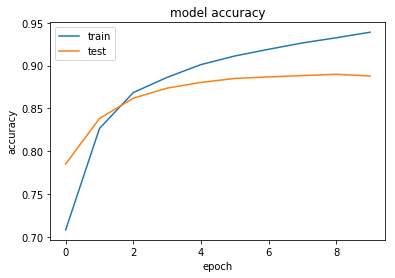

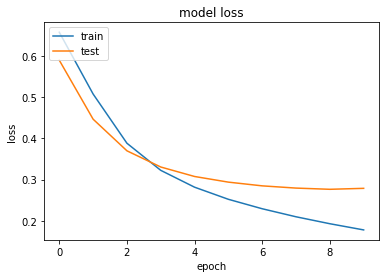

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [20]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 143us/sample - loss: 0.2910 - acc: 0.8800


[0.29102692535400393, 0.88]

### inference

256x10000의 matrix인데 여기에 나타는 1이나 10이하의 많은 리뷰는 어떻ㄱ 되는가


In [21]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

pad는 256이 안되는 단어를 채워주는 것. 